In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv('train.csv')
data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [83]:
data.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [84]:
data.shape

(8693, 14)

In [85]:
data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [86]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

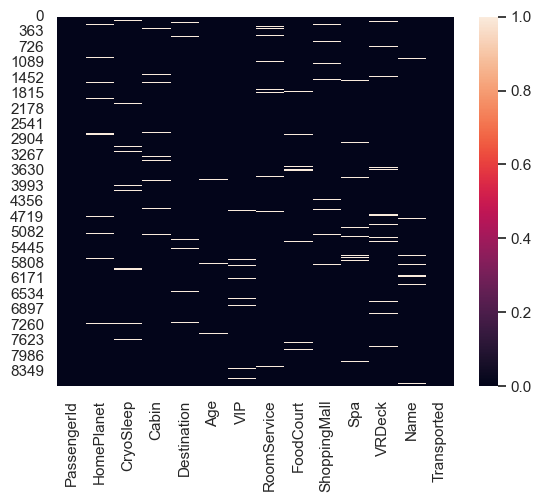

In [87]:
sns.heatmap(pd.isnull(data));

# EDA

Let's see if target is balanced or not.

<AxesSubplot: >

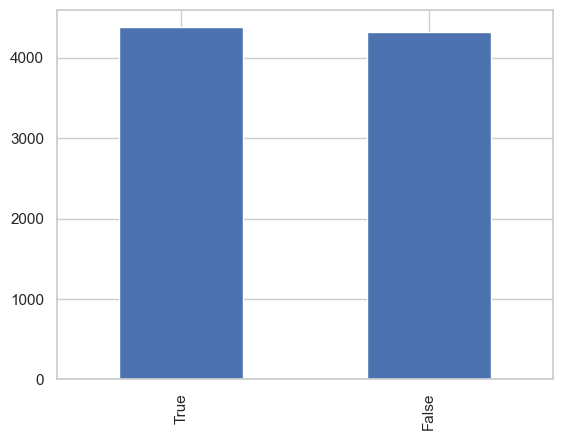

In [88]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

so the data is balanced

<AxesSubplot: xlabel='VIP', ylabel='count'>

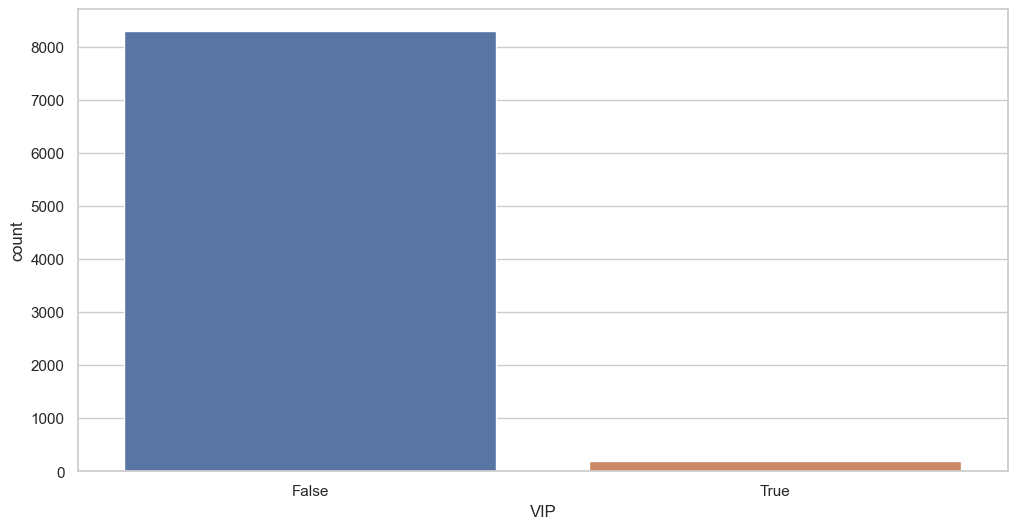

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='VIP')

Being VIP or not is not balanced and VIPs are so less than nonentities.

Let's check the distribution of data

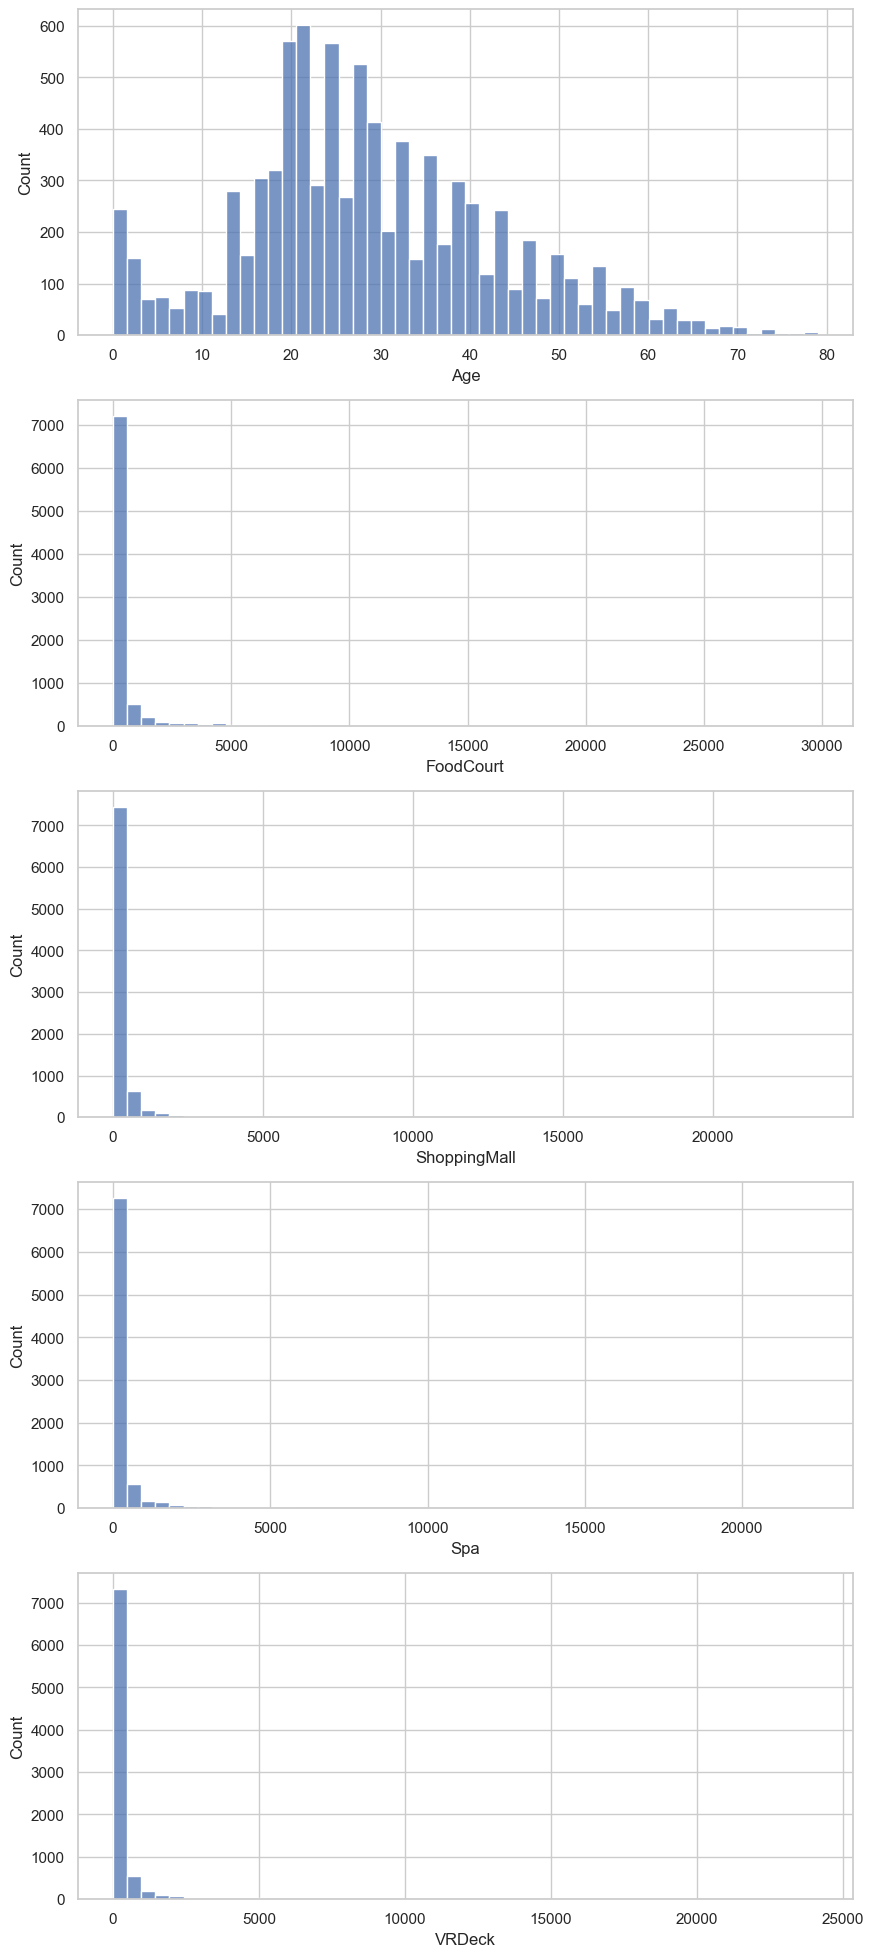

In [90]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);

As we can see all of these data(above plots) have a skewness.

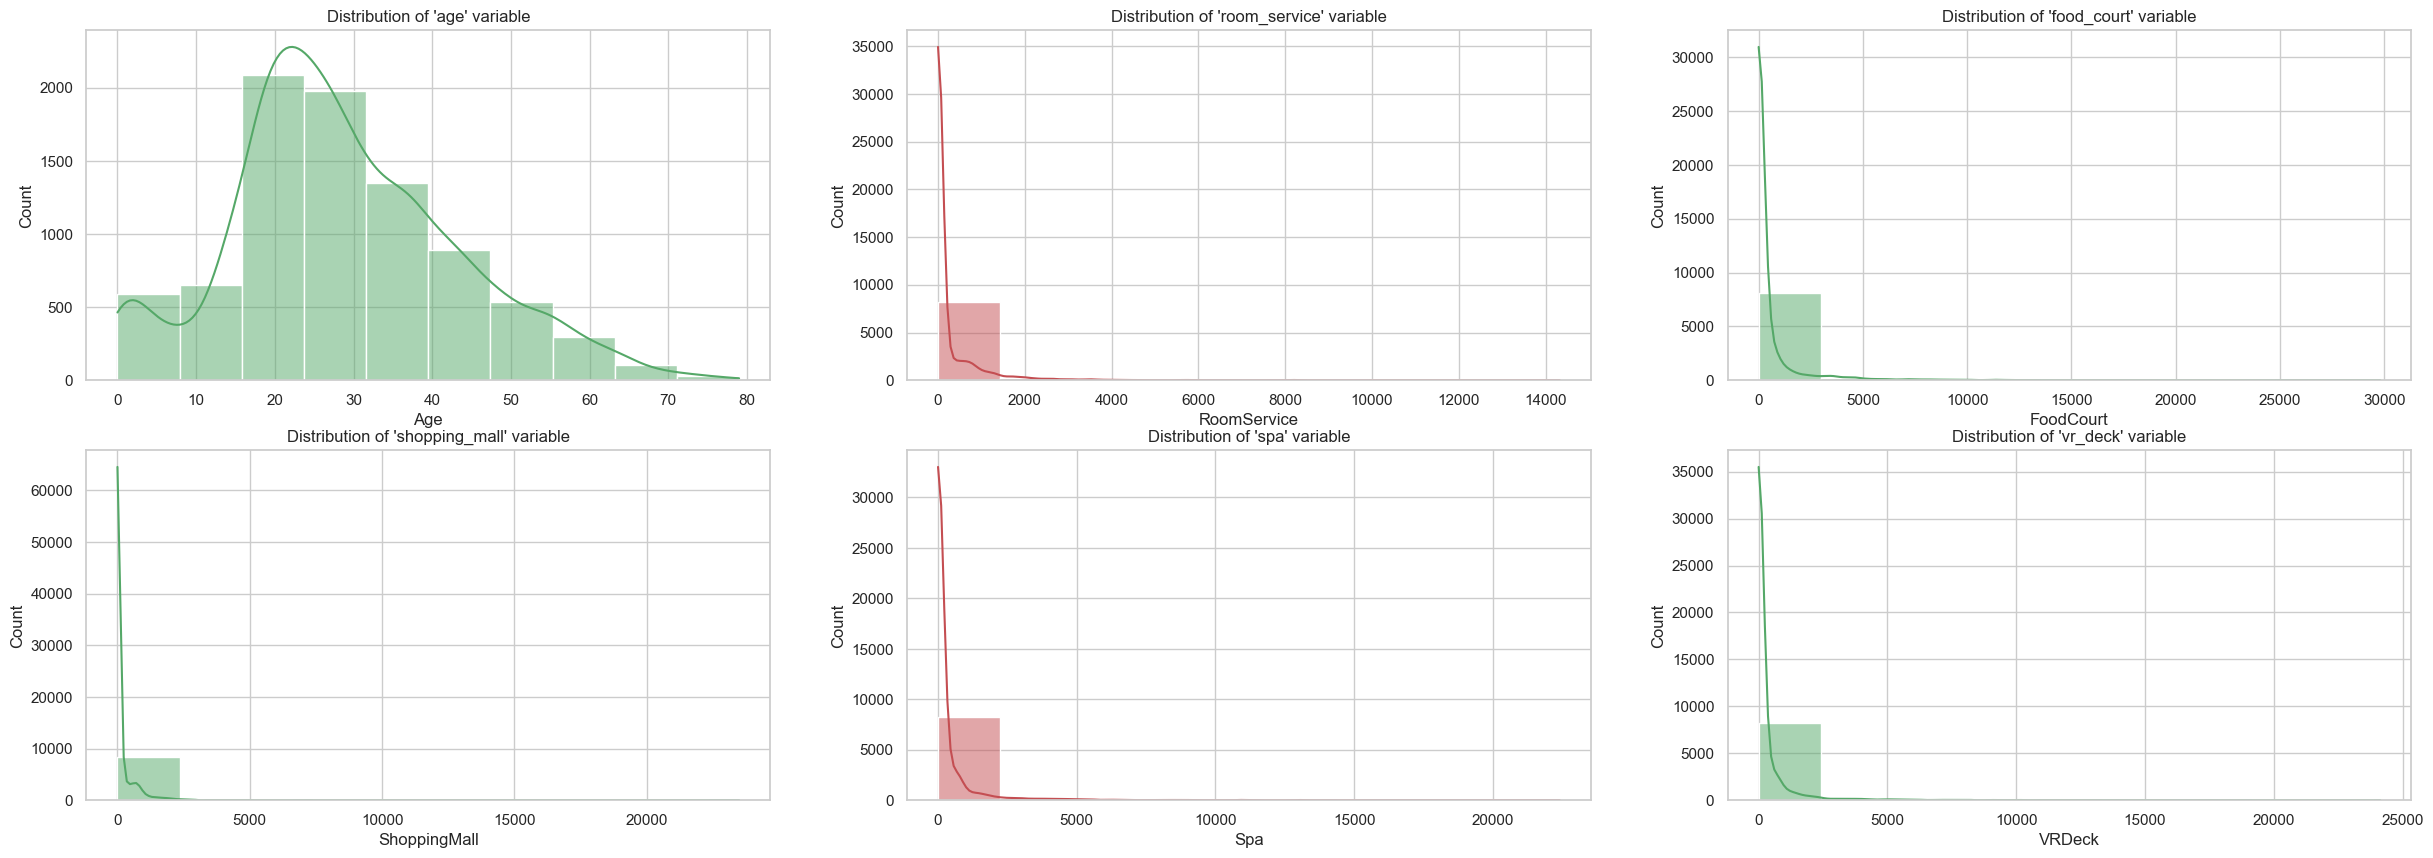

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
axes = axes.flatten()
sns.histplot(ax = axes[0], x = data["Age"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'age' variable");

sns.histplot(ax = axes[1], x = data["RoomService"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'room_service' variable");

sns.histplot(ax = axes[2], x = data["FoodCourt"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'food_court' variable");

sns.histplot(ax = axes[3], x = data["ShoppingMall"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'shopping_mall' variable");

sns.histplot(ax = axes[4], x = data["Spa"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'spa' variable");

sns.histplot(ax = axes[5], x = data["VRDeck"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'vr_deck' variable");


Analyzing the graphs here, it turns out that the values of the variables are not normally distributed.

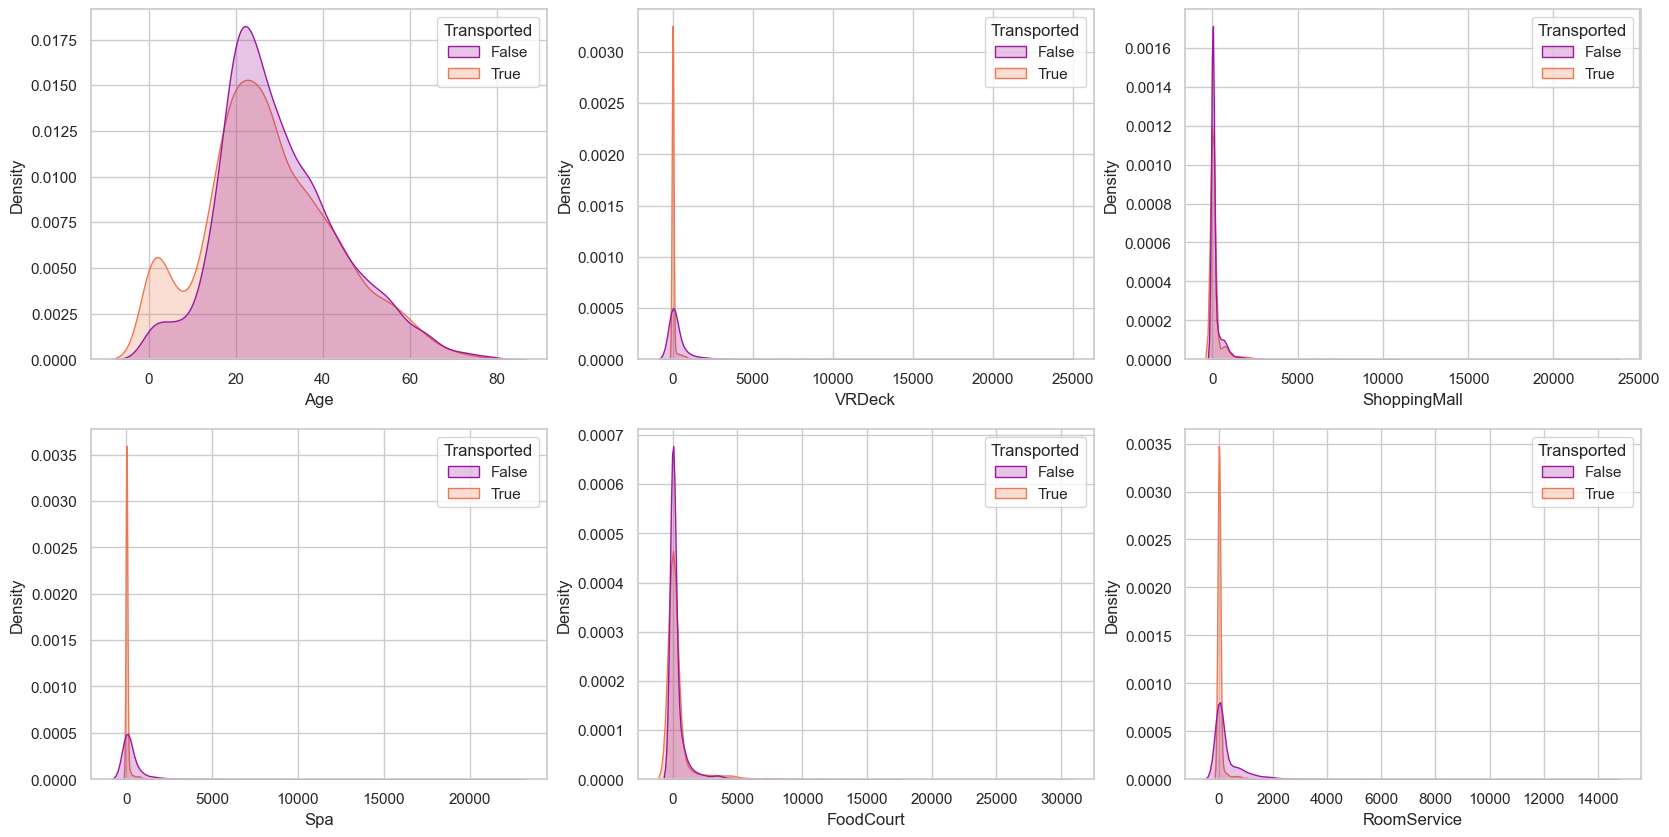

In [92]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(x='Age', hue='Transported', data=data, palette='plasma', ax=axs[0][0], fill=True);
sns.kdeplot(x='VRDeck', hue='Transported', data=data, palette='plasma', ax=axs[0][1], fill=True);
sns.kdeplot(x='Spa', hue='Transported', data=data, palette='plasma', ax=axs[1][0], fill=True);
sns.kdeplot(x='FoodCourt', hue='Transported', data=data, palette='plasma', ax=axs[1][1], fill=True);
sns.kdeplot(x='ShoppingMall', hue='Transported', data=data, palette='plasma', ax=axs[0][2], fill=True);
sns.kdeplot(x='RoomService', hue='Transported', data=data, palette='plasma', ax=axs[1][2], fill=True);

Using these two sets of plots we wanted to investigate the relation between each numerical variable and the target variable but as it is clear the distribution of each variable in both categories is approximately the same.So, it is not possible to give a definite opinion.

Let's group people by their age.

In [93]:
baby = data[data["Age"] <= 5]
kid = data[(data["Age"] > 5) & (data["Age"] <= 10)]
teenager = data[(data["Age"] > 10) & (data["Age"] <= 20)]
youth = data[(data["Age"] > 20) & (data["Age"] <= 40)]
adult = data[(data["Age"] > 40) & (data["Age"] <= 60)]
old = data[(data["Age"] > 60)]

print("Number of baby passengers: ", baby.shape[0])
print("Number of kid passengers: ", kid.shape[0])
print("Number of teenager passengers: ", teenager.shape[0])
print("Number of youth passengers: ", youth.shape[0])
print("Number of adult passengers: ", adult.shape[0])
print("Number of old passengers: ", old.shape[0])

Number of baby passengers:  499
Number of kid passengers:  219
Number of teenager passengers:  1717
Number of youth passengers:  4348
Number of adult passengers:  1511
Number of old passengers:  220


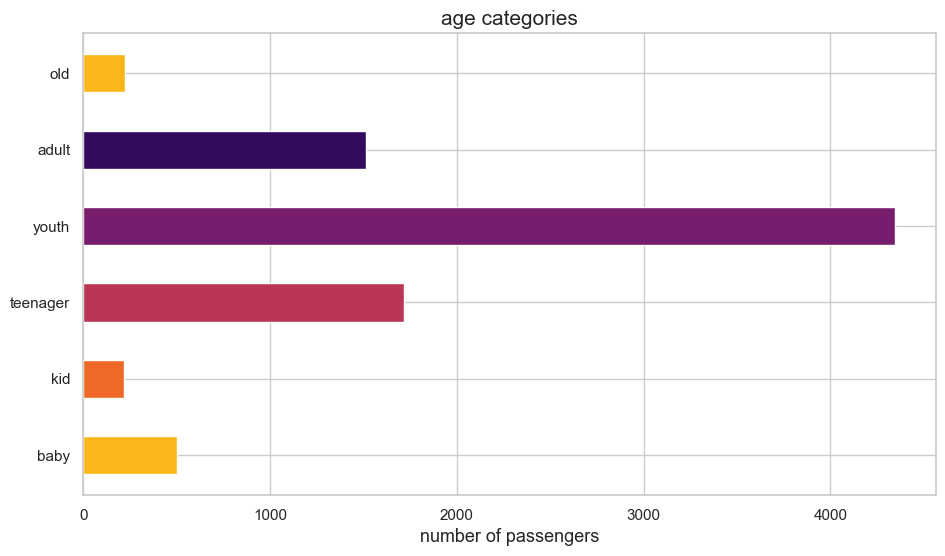

In [94]:
ages = {"baby" : baby.shape[0], "kid" : kid.shape[0],
        "teenager" : teenager.shape[0], "youth" : youth.shape[0],
        "adult" : adult.shape[0], "old" : old.shape[0]}
ages = pd.Series(ages)

plt.figure(figsize = (11, 6))
plt.title("age categories", fontsize = 15)
plt.xlabel("number of passengers", fontsize = 13)

plt.barh(ages.index, ages.values, color = sns.color_palette("inferno_r", 5),
         height = 0.5)
plt.show()

As we can see youth people are more than the other.

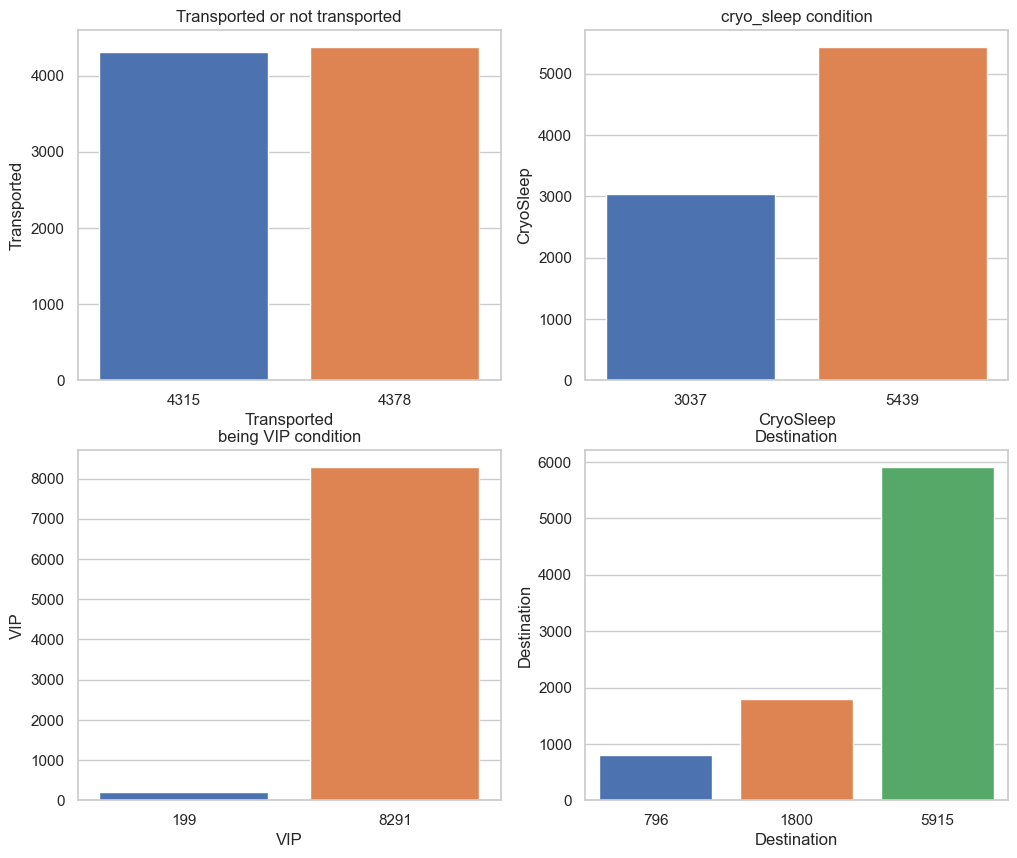

In [95]:
data["Transported"] = data["Transported"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"])
data["VIP"] = data["VIP"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")
data["CryoSleep"] = data["CryoSleep"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0], x = data["Transported"].value_counts(),
            y = data["Transported"].value_counts(),
            data = data, saturation = 1).set(title = "Transported or not transported");

sns.barplot(ax = axes[1], x = data["CryoSleep"].value_counts(),
            y = data["CryoSleep"].value_counts(),
            data = data, saturation = 1).set(title = "cryo_sleep condition");

sns.barplot(ax = axes[2], x = data["VIP"].value_counts(),
            y = data["VIP"].value_counts(),
            data = data, saturation = 1).set(title = "being VIP condition");

sns.barplot(ax = axes[3], x = data["Destination"].value_counts(),
            y = data["Destination"].value_counts(),
            data = data, saturation = 1).set(title = "Destination");

By using last cell we can get that our categorical features are not balance(except transported)

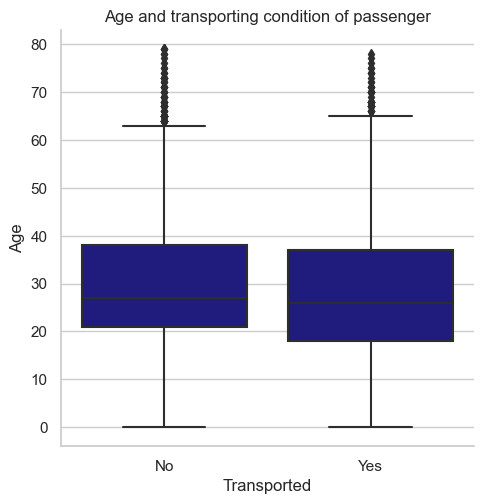

In [96]:
sns.catplot(x = "Transported",
            y = "Age",
            kind = "box",
            color = '#100C8E',
            data = data).set(title = "Age and transporting condition of passenger");

This box plot can help us again to understand that transported is balance. Also, there are some outliers.

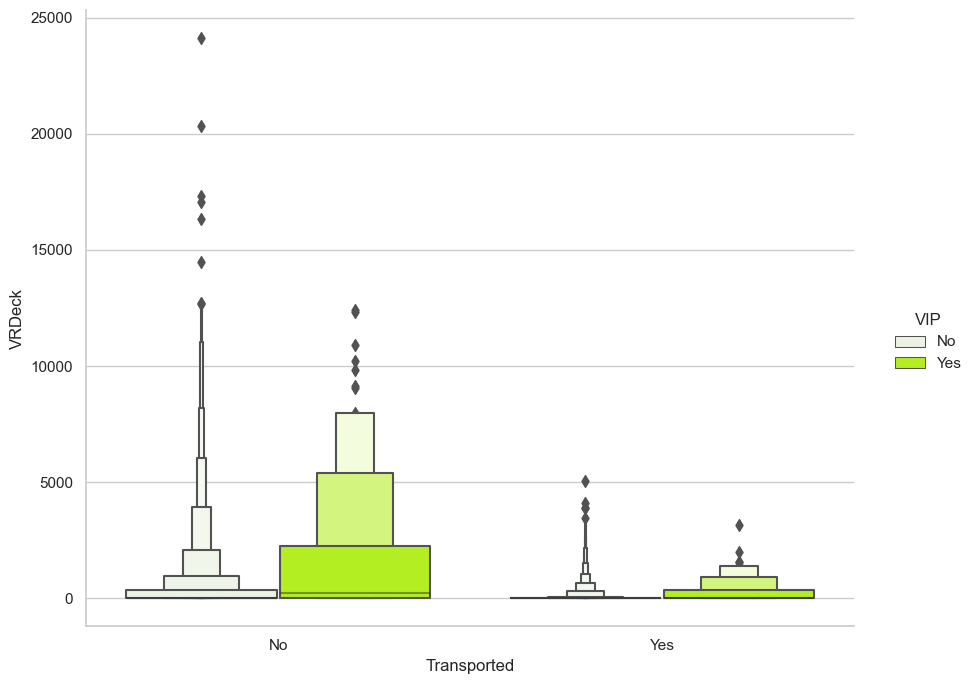

In [97]:
sns.catplot(x = "Transported",
            y = "VRDeck",
            kind = "boxen",
            hue = "VIP",
            ci = "sd",
            color = '#B3EE22',
            data = data, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True);

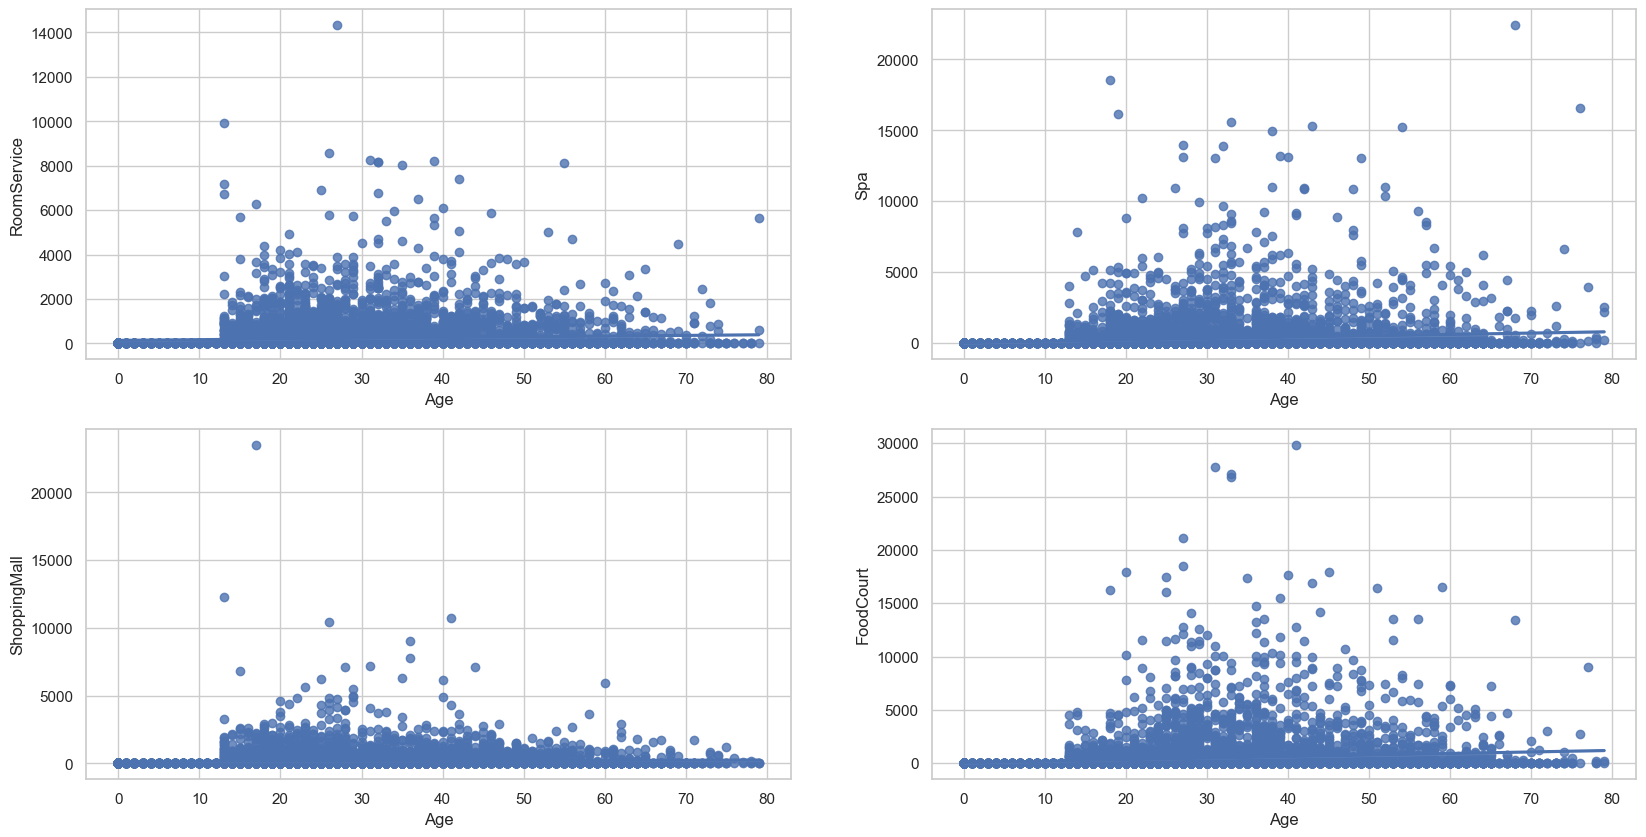

In [98]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "Age", y = "RoomService", data = data);
sns.regplot(ax = axes[1], x = "Age", y = "Spa", data = data);
sns.regplot(ax = axes[2], x = "Age", y = "ShoppingMall", data = data);
sns.regplot(ax = axes[3], x = "Age", y = "FoodCourt", data = data);

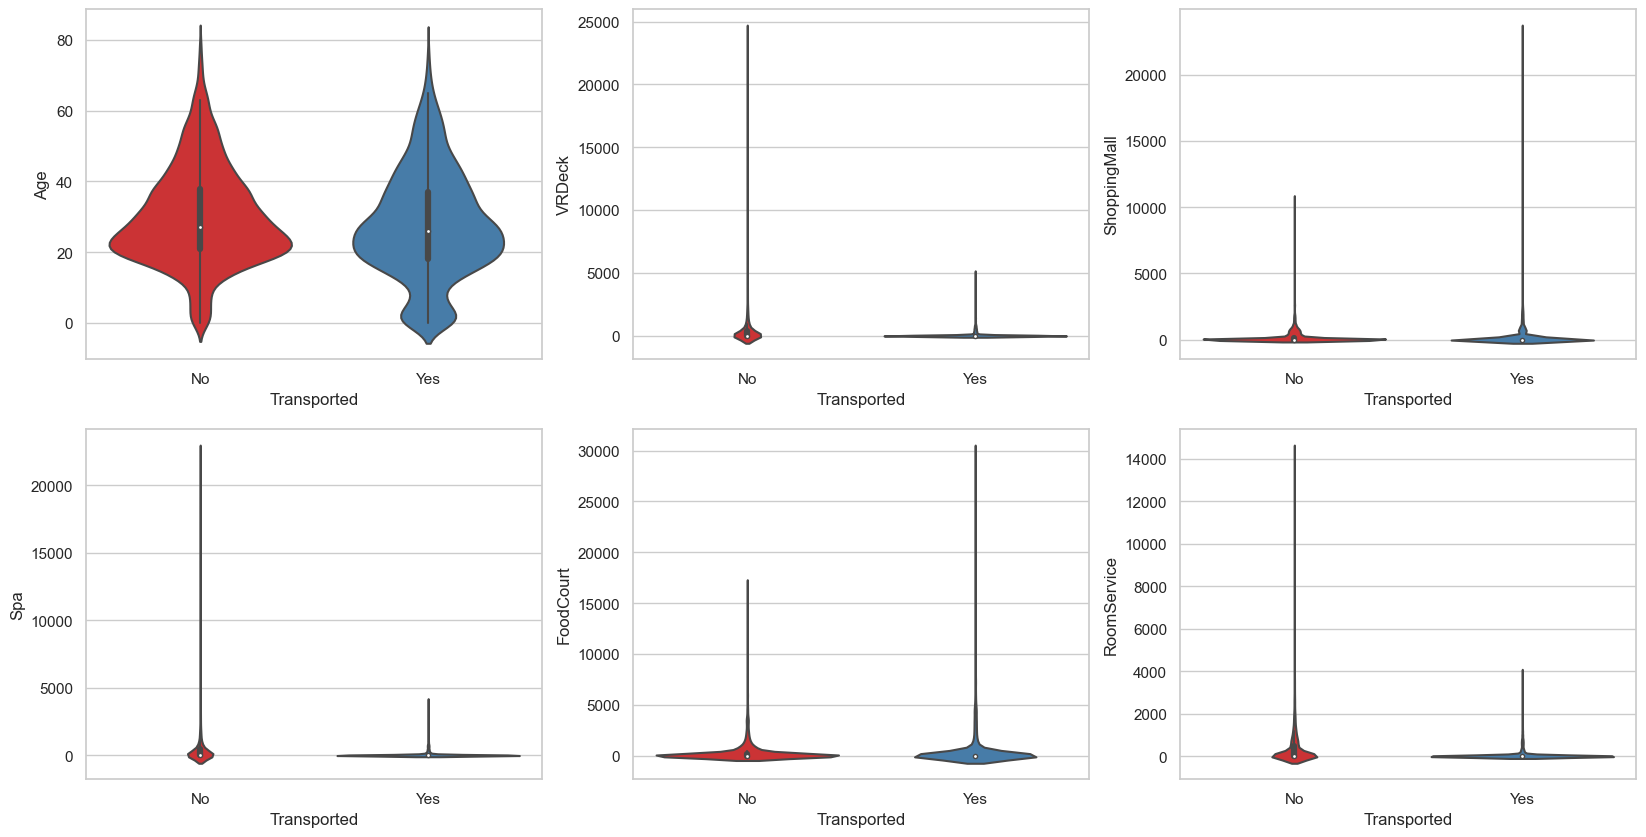

In [99]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.violinplot(y='Age', x='Transported', data=data, palette='Set1', ax=axs[0][0]);
sns.violinplot(y='VRDeck', x='Transported', data=data, palette='Set1', ax=axs[0][1]);
sns.violinplot(y='Spa', x='Transported', data=data, palette='Set1', ax=axs[1][0]);
sns.violinplot(y='FoodCourt', x='Transported', data=data, palette='Set1', ax=axs[1][1]);
sns.violinplot(y='ShoppingMall', x='Transported', data=data, palette='Set1', ax=axs[0][2]);
sns.violinplot(y='RoomService', x='Transported', data=data, palette='Set1', ax=axs[1][2]);

These plots help us to understand the distribution of transported or not data in terms of other features.

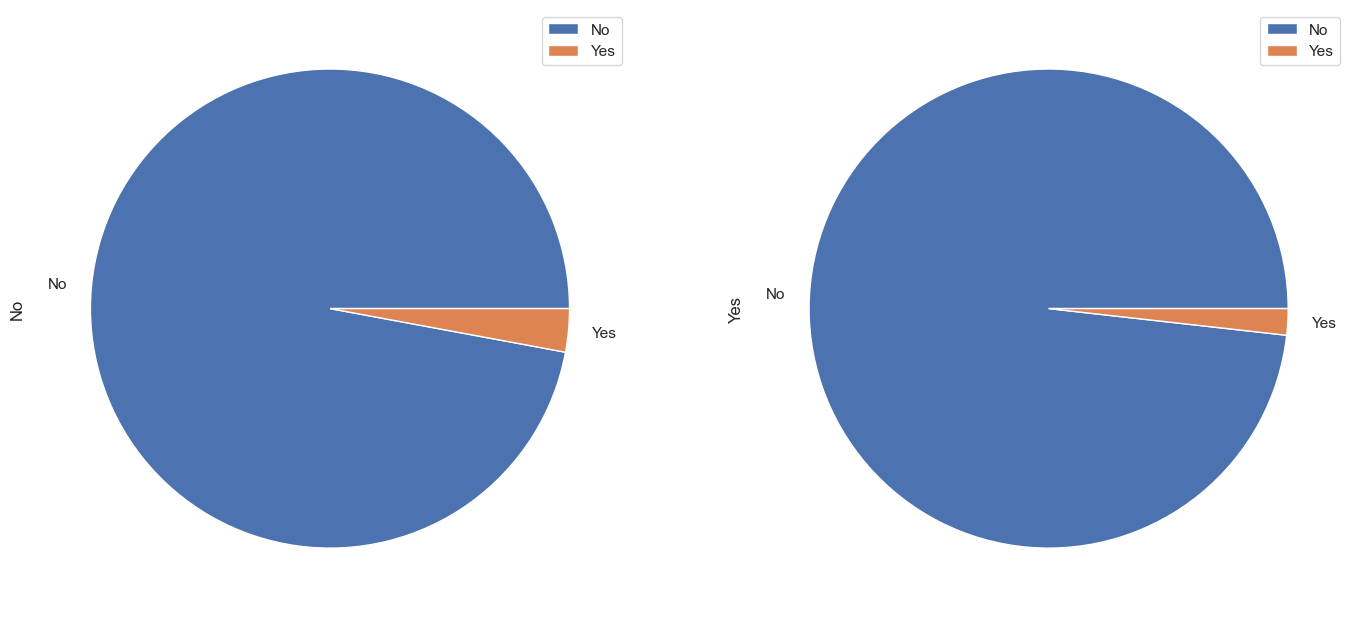

In [100]:
pd.crosstab(data["VIP"], data["Transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (17, 10), subplots = True, stacked=True);

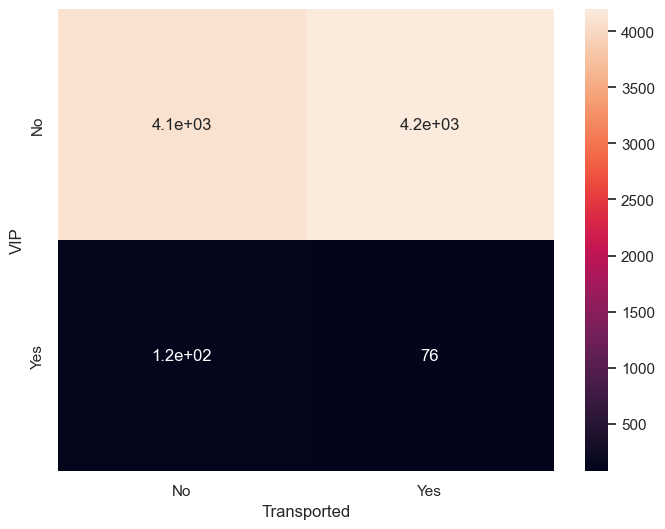

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(data['VIP'], data['Transported']), annot=True)
plt.ylabel('VIP')
plt.xlabel('Transported')
plt.show()

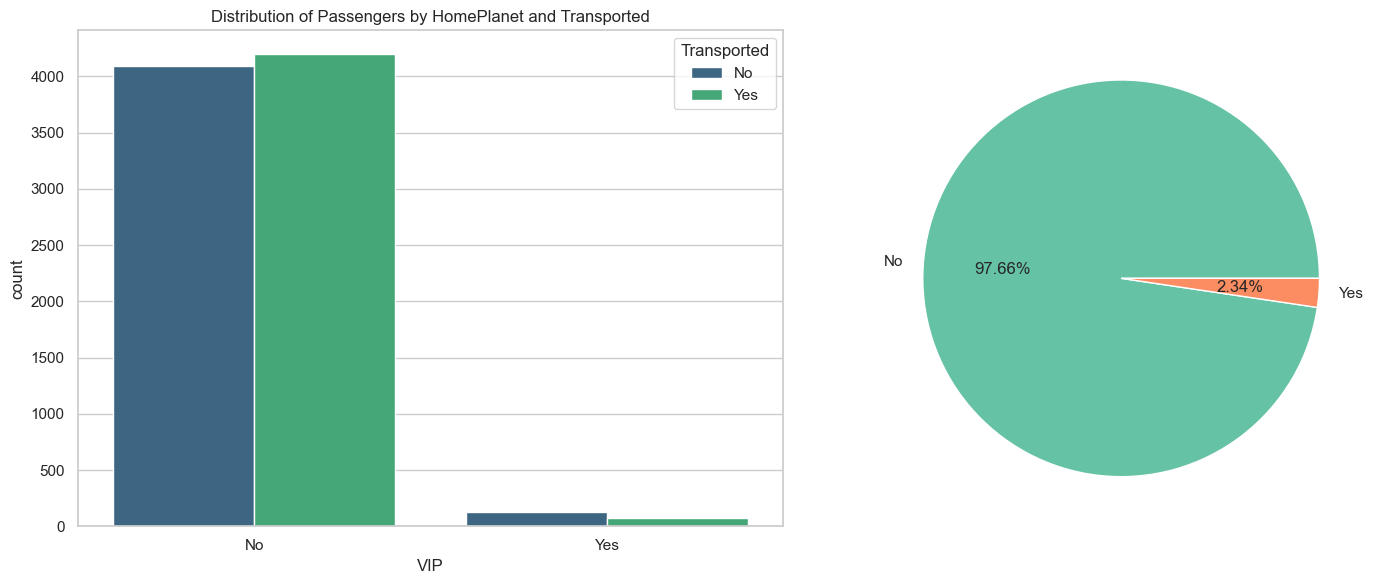

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='VIP', hue='Transported', data=data, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data['VIP'].value_counts(), labels=data['VIP'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

From this plot we can see that not being VIP has a direct effect on being transported and being VIP has a effect on not be transported.

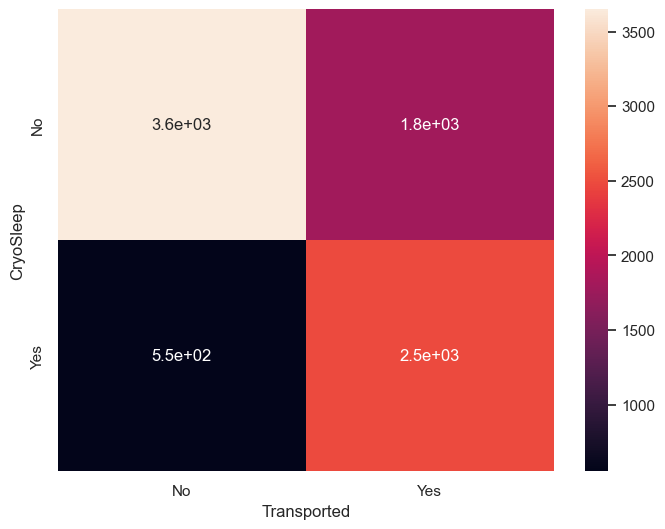

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(data['CryoSleep'], data['Transported']), annot=True)
plt.ylabel('CryoSleep')
plt.xlabel('Transported')
plt.show()

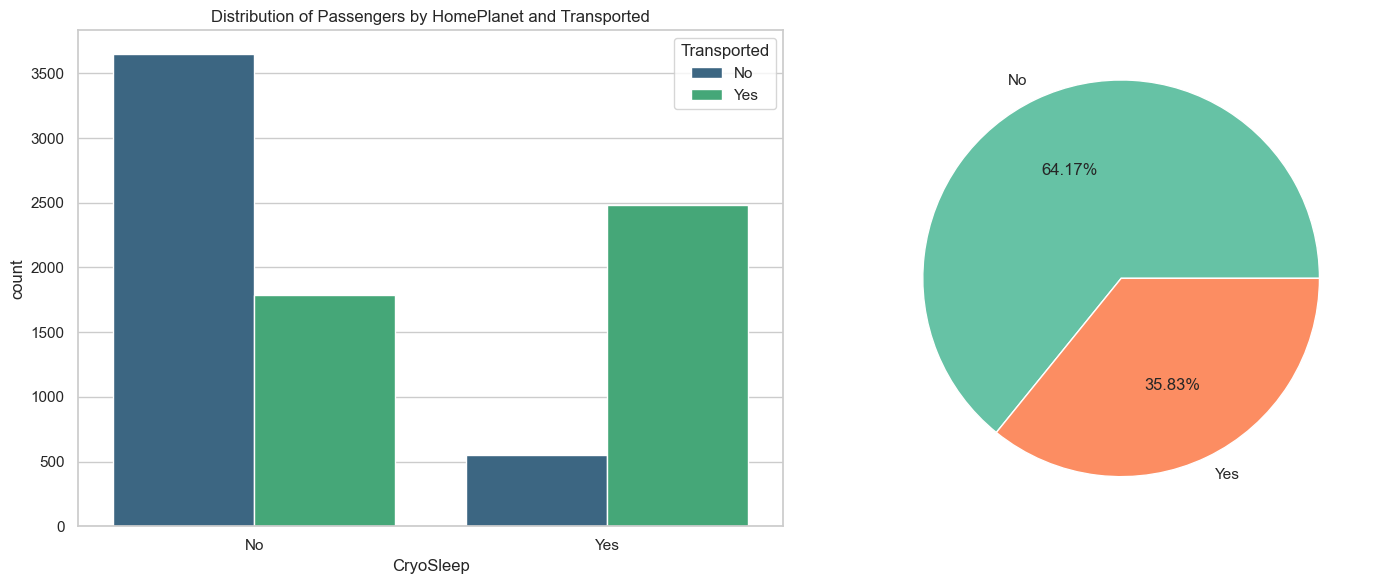

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='CryoSleep', hue='Transported', data=data, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data['CryoSleep'].value_counts(), labels=data['CryoSleep'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

Being CryoSleep or not has a direct effect on being Transported(if be false then transported with higher chance would be false and vise versa).

In [105]:
import plotly.express as px
fig = px.histogram(data_frame = data,
                   x="Age",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

In [106]:
numerical_cols=["Age","RoomService","Spa","VRDeck","ShoppingMall","FoodCourt"]
categorical_cols=[feature for feature in data.columns if feature not in numerical_cols]
feature = 'HomePlanet'
df=data[feature].value_counts().reset_index()

fig=px.pie(df,values=df.columns[1],names=df.columns[0],
           labels={"index":"<b>"+feature,feature:"Count"},
           color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title="<b>"+feature, title_font_size=30,
                  font_size=20,
                  title_x=0.5,legend_bordercolor="#000",legend_borderwidth=2,
                  hoverlabel_font_size=20)
fig.update_traces(marker=dict( line=dict(color='#000000', width=2)))
fig.show()

## Observation

__Homeplanet:__ most people was from Earth Followed by Europa, Mars

__Cryosleep:__ most people was not in CryoSleep

__Destination:__ mostly people was debarking to TRAPPIST-1e Followed by Canri e, PSO

__Vip:__ frequency of non VIP people quite large Compared VIP people

__Transported:__ no. of non transported is greater than transported people

__No.inGroup:__ Majority of the were travellling alone in their group

__Cabin Name:__ majority of people were in G and F cabin .

__Cabin side:__ NO of people on both sides is almost equal

In [107]:
for feature in categorical_cols:
     if feature not in['Passenger_group','firstname','last_name','Cabin_no.',"Transported"]:
        fig=px.histogram(data,x=feature,facet_col="Transported",color="Transported",color_discrete_sequence=px.colors.qualitative.Alphabet_r)
        fig.update_layout(title="<b>"+feature+" vs Transported", title_font_size=30,
                             font_size=20,
                             title_x=0.5,
                             hoverlabel_font_size=20,template="plotly_dark")

        fig.show()



## Observation
__Homeplanet__ Europa amd marks has more transported people than Earth even though earth has more no. of people transported but it has lower transport 

__Cryosleep__ cryosleep people shows better transport percentage than non cryosleep people(so if you are in cryosleep you are most like be transported)

__Destination__ Trappist-1e has greate no of transported people but if we see who has better %of tranported people I will sayits 55 cancrie

__Vip__ Non Vip person has Equal chance of being on either side (tranported or non transported) but Vip has more than half the chance that they will not transported ..

__Cabin__ Deck B And C has more chance of getting transported . E has more chance of getting Not tranported.

__Cabin Side__ equal chance on both cabin being on either of side as code



In [108]:
for feature in numerical_cols:
    fig=px.violin(data,x=feature,color="Transported",title="<b>"+feature+" Distribution",template="plotly_dark" )
    fig.update_layout(hovermode='x',title_font_size=30)
    fig.update_layout(
    title_font_color="#ffff00",
    template="plotly_dark",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5
    )
    fig.show()

In [109]:
for feature in numerical_cols:
    fig=px.histogram(data,x=feature,title="<b>"+feature+"Vs Transported",color="Transported",template="plotly_dark")
    fig.update_layout(hovermode='x',title_font_size=30)
    fig.update_layout(
    title_font_color="#ffff00",
    template="plotly_dark",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5)
    fig.show()

## Obervation
skewed data(right)
all of them have outliers
Age show similar distribution except when age is b/w 0-4 where people were transported very much large than no transported why this age is zero??

In [110]:
data["Transported"] = data["Transported"].replace(to_replace = ["No", "Yes"],
                                  value = [False, True])
fig=px.parallel_coordinates(data,color="Transported",title="<b>Multivariate plot for Numerical Data", color_continuous_scale='Viridis',
                              range_color=(0, 1))
fig.update_layout(title_font_size=30,title_x=0.5)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Cant see very strong relationship in any of the numerical features

In [111]:
data[["Cabin_deck","Cabin_no.","Cabin_side"]]=data["Cabin"].str.split("/",expand=True)
fig=px.imshow(
    pd.crosstab(data["Cabin_deck"],data["Cabin_side"]).T
    ,text_auto=True,title="No. of people Travelling in (Cabin_DecK,Cabin_side)",
    labels={"color":"<b>No.of people"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

In [112]:
fig=px.imshow(
    pd.crosstab(data["Cabin_deck"],data["Cabin_side"],data["Transported"],aggfunc="mean").round(3).T
    ,text_auto=True,title="of people Transported(1) in (Cabin_DecK,Cabin_side)",
    labels={"color":"<b>%Transpoted"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

## Observation

Not so much of difference in these categories , I think not much of useful information here

In [113]:
fig=px.imshow(
    pd.crosstab(data["HomePlanet"],data["CryoSleep"]).T
    ,text_auto=True,title="<b>No. of people Travelling in (HomePlanet,Cryosleep)",
    labels={"color":"<b>No.of people"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

In [114]:
fig=px.imshow(
    pd.crosstab(data["HomePlanet"],data["CryoSleep"],data["Transported"],aggfunc="mean").round(3).T
    ,text_auto=True,title="<b>No. of people Travelling in (HomePlanet,Cryosleep)",
    labels={"color":"<b>%Transpoted"},color_continuous_scale=px.colors.sequential.haline_r)
fig.update_layout(font_size=15,font_color="#ffcce6",
                 title_font_size=30,title_font_color="Orange",template="plotly_dark")
fig.show()

## Observation

__Europa__ Cryosleep people has 99% chance they will get transported , and non crysleep has only 40% chance

__Mars__ cryosleep people has 91 % cahnce and non cryosleep has only 27 %

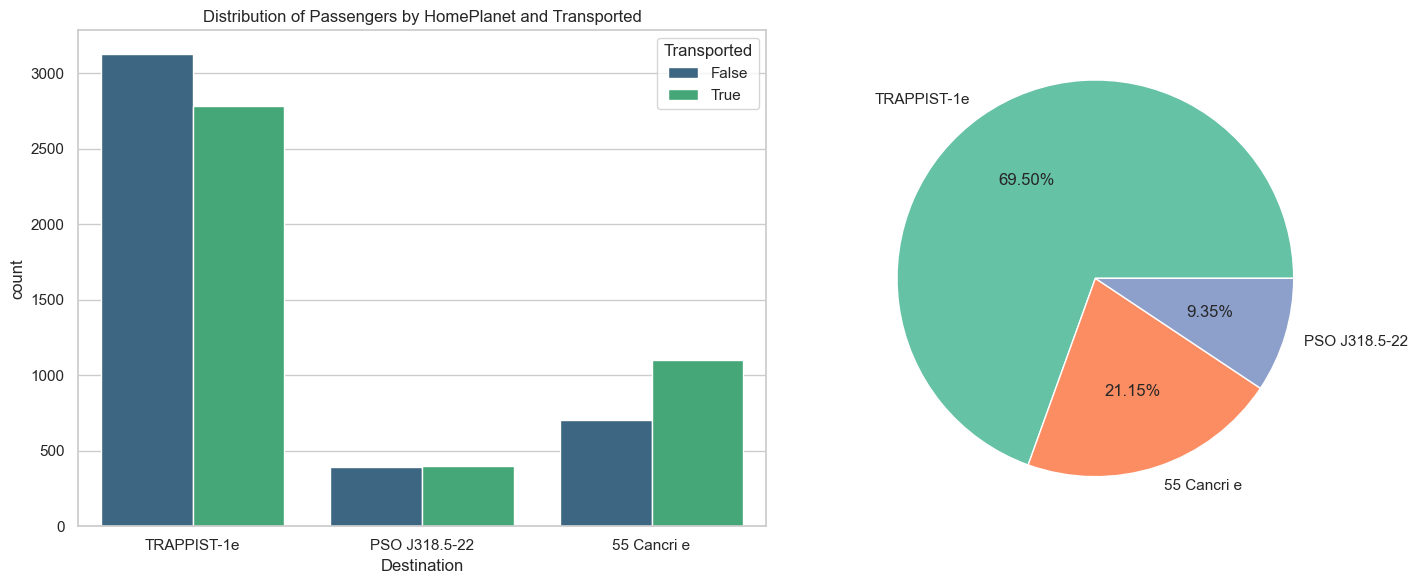

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='Destination', hue='Transported', data=data, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data['Destination'].value_counts(), labels=data['Destination'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

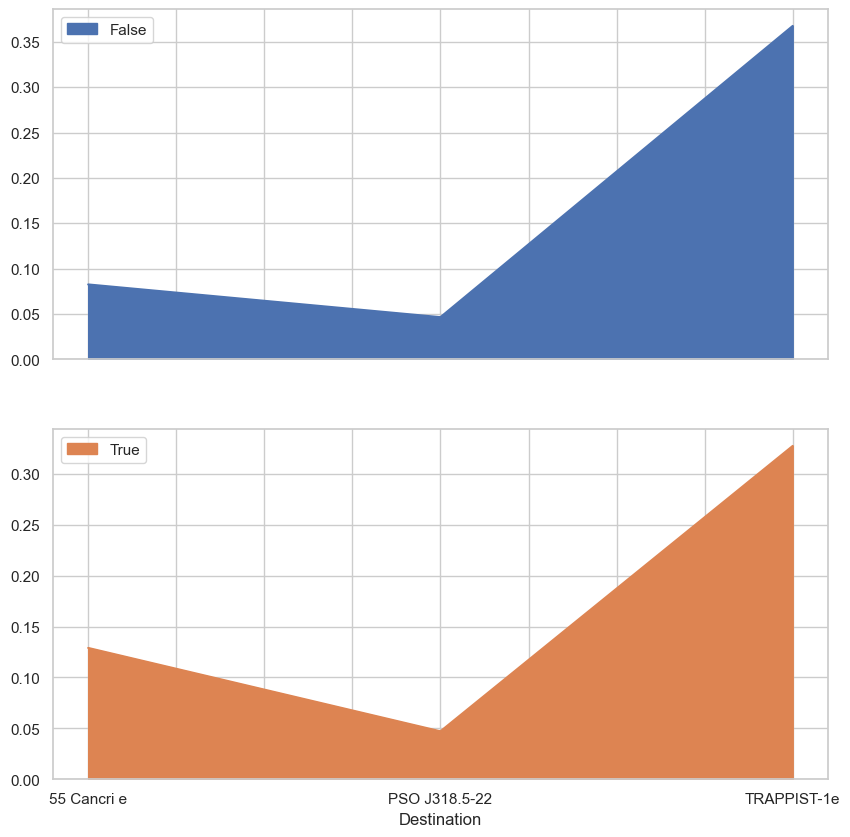

In [116]:
pd.crosstab(data["Destination"], data["Transported"],
            normalize = True).plot(kind = "area",
                                   figsize = (10, 10),
                                   subplots = True, stacked=True);

From these two plots we can see that destination is effective if the destination is Cancri e there is more chance to be transported and if the destination is TRAPPIST-1e there is more chance to not be transported and for PSO J318.5-22 it is 50-50.

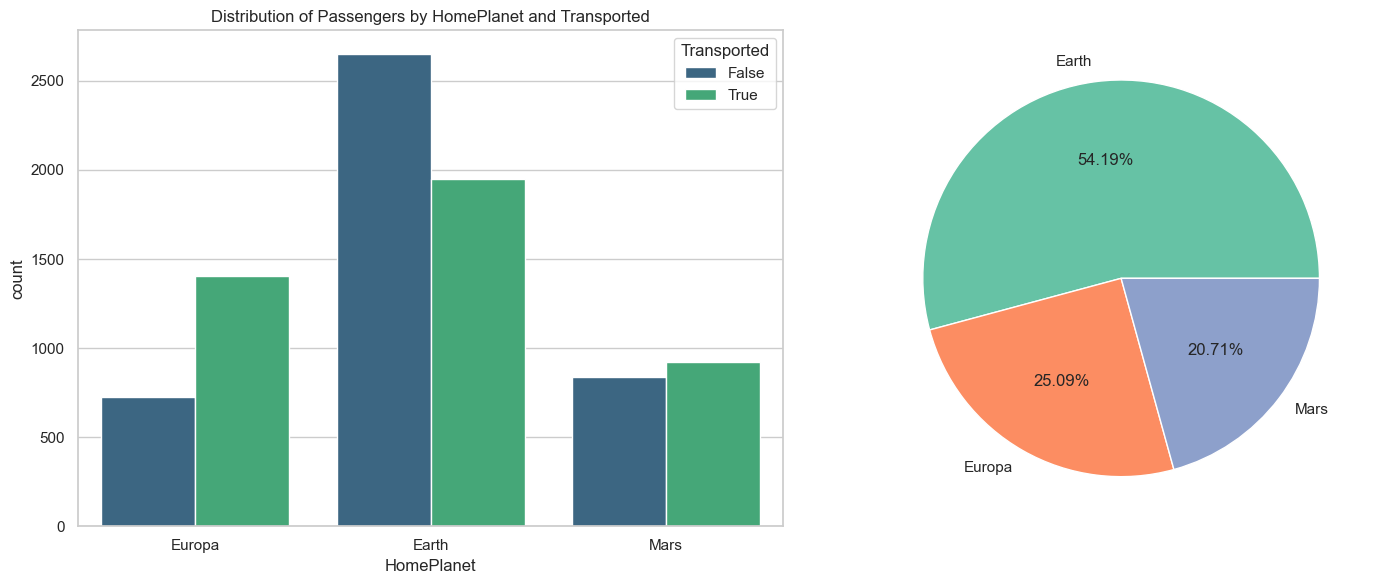

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='HomePlanet', hue='Transported', data=data, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data['HomePlanet'].value_counts(), labels=data['HomePlanet'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

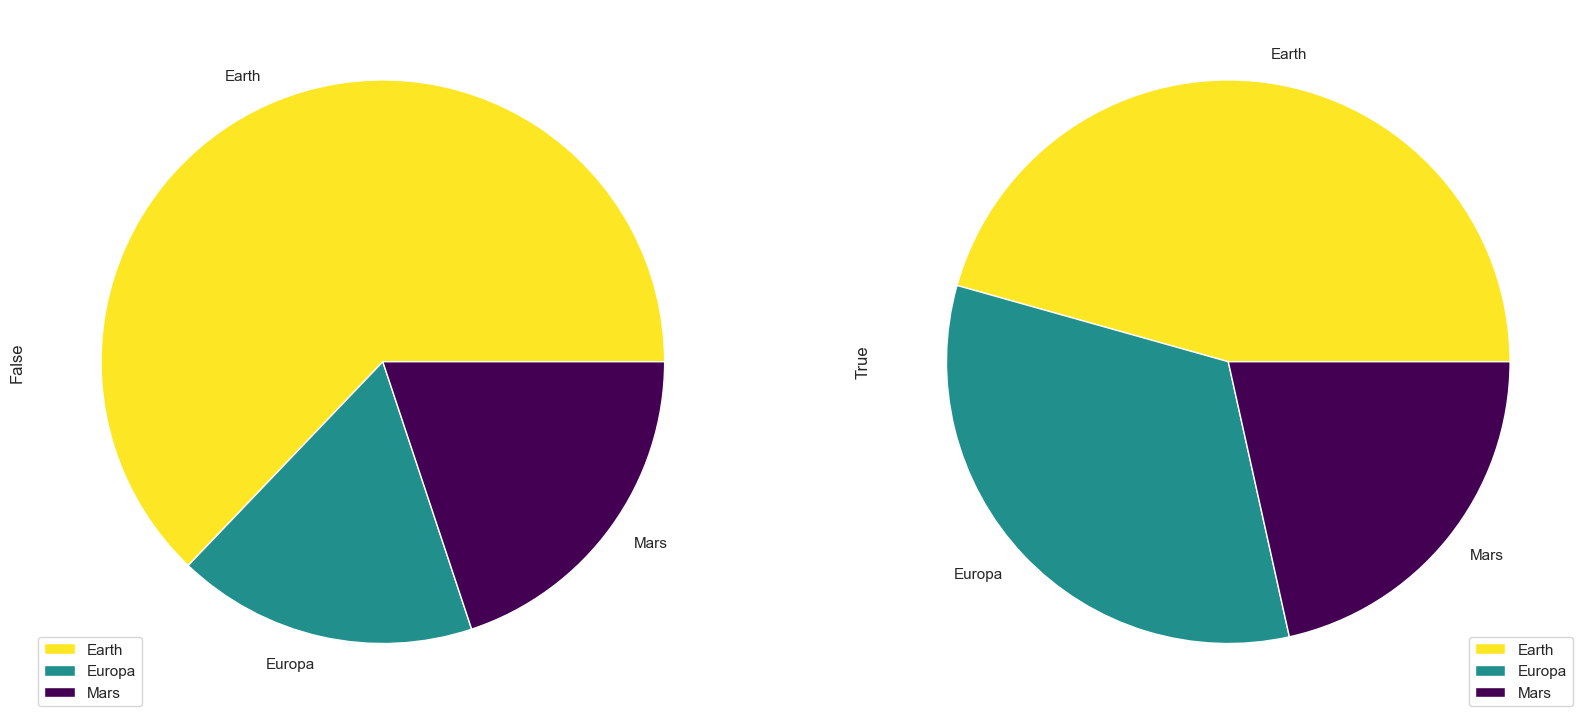

In [118]:
pd.crosstab(data["HomePlanet"], data["Transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (20, 20), colormap = "viridis_r",
                                   subplots = True, stacked=True);

This plot show us that home planet is effective on transported. As we can see if someone is from Europa with higher chance would be transported, from earth with a higher chance not be transported and for mars it is approximately 50-50.

<AxesSubplot: >

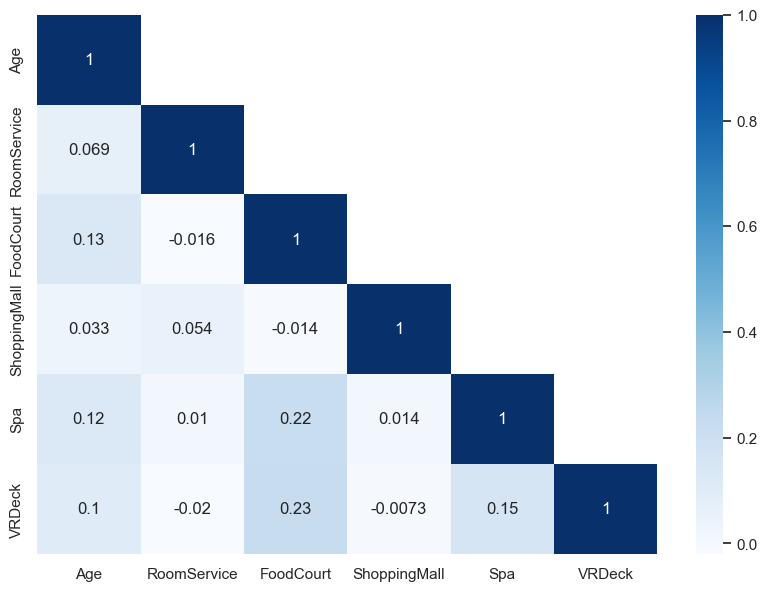

In [119]:
num_data = data.select_dtypes(['float', 'int'])
corr_matrix = num_data.corr()
plt.figure(figsize=(10, 7))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# cleaning data

In [120]:
data = pd.read_csv('train.csv')

name and passenger id would not help us to improve our model so we drop them.

In [121]:
data = data.drop(['PassengerId', 'Name'], axis=1)
data

HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0        Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0   
1         Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0   
2        Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0   
3        Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0   
4         Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0   
...         ...       ...       ...            ...   ...    ...          ...   
8688     Europa     False    A/98/P    55 Cancri e  41.0   True          0.0   
8689      Earth      True  G/1499/S  PSO J318.5-22  18.0  False          0.0   
8690      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False          0.0   
8691     Europa     False   E/608/S    55 Cancri e  32.0  False          0.0   
8692     Europa     False   E/608/S    TRAPPIST-1e  44.0  False        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0           0.0           0.0     0.0     0.0        False  
1           9.0          25.0   549.0    44.0         True  
2        3576.0           0.0  6715.0    49.0        False  
3        1283.0         371.0  3329.0   193.0        False  
4          70.0         151.0   565.0     2.0         True  
...         ...           ...     ...     ...          ...  
8688     6819.0           0.0  1643.0    74.0        False  
8689        0.0           0.0     0.0     0.0        False  
8690        0.0        1872.0     1.0     0.0         True  
8691     1049.0           0.0   353.0  3235.0        False  
8692     4688.0           0.0     0.0    12.0         True  

[8693 rows x 12 columns]

Let's split data in train and test

In [122]:
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(data, random_state=42, train_size=0.8)

let's check null values.

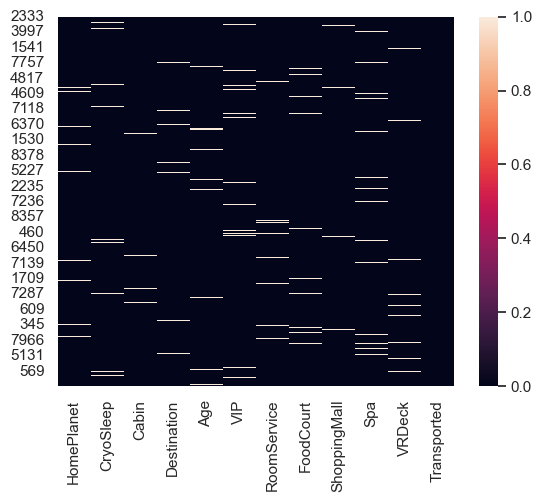

In [123]:
sns.heatmap(pd.isnull(trainData));

let's fill the categorical null values with mode and fill the numerical data with sklearn.impute.SimpleImputer

In [124]:
from sklearn.impute import SimpleImputer

numericalImputer = SimpleImputer(strategy='median')
categoricalImputer = SimpleImputer(strategy='most_frequent')

test_numeric_data = testData.select_dtypes(['float', 'int'])
train_numeric_data = trainData.select_dtypes(['float', 'int'])

test_str_data = testData.select_dtypes(['object', 'bool'])
train_str_data = trainData.select_dtypes(['object', 'bool'])

train_numeric_data = pd.DataFrame(numericalImputer.fit_transform(train_numeric_data), columns=train_numeric_data.columns, index=train_numeric_data.index)
train_str_data = pd.DataFrame(categoricalImputer.fit_transform(train_str_data), columns=train_str_data.columns, index=train_str_data.index)

test_numeric_data = pd.DataFrame(numericalImputer.transform(test_numeric_data), columns=test_numeric_data.columns, index=test_numeric_data.index)
test_str_data = pd.DataFrame(categoricalImputer.transform(test_str_data), columns=test_str_data.columns, index=test_str_data.index)

trainData = pd.concat([train_numeric_data, train_str_data], axis=1)
testData = pd.concat([test_numeric_data, test_str_data], axis=1)

In [125]:
trainData.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Transported     0
dtype: int64

In [126]:
testData.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Transported     0
dtype: int64

As we can see we fill all null values.

let's drop duplicated data

In [127]:
trainData = trainData.drop_duplicates()
testData = testData.drop_duplicates()

let's check outliers.

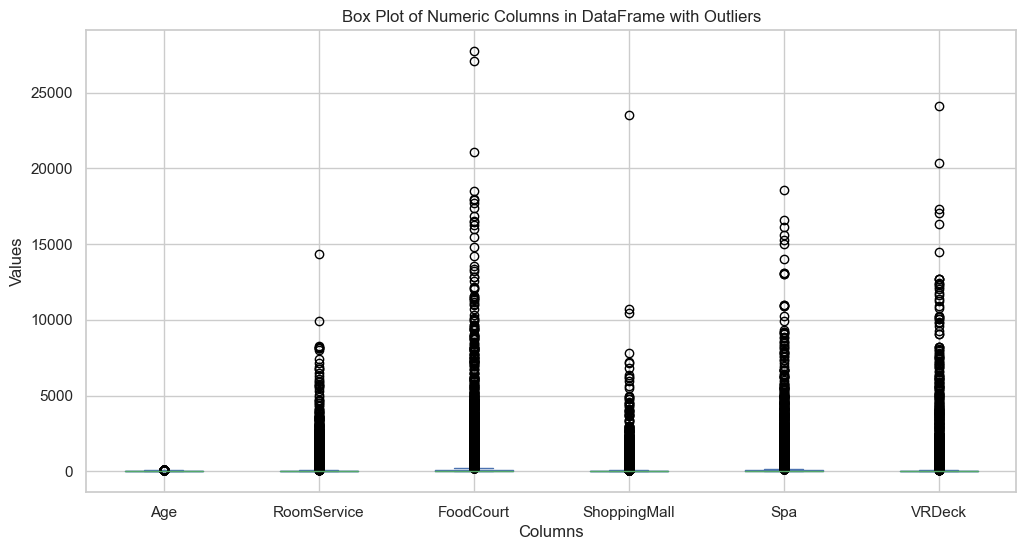

In [128]:
numeric_cols = trainData.select_dtypes(include='number').columns
trainData[numeric_cols].plot(kind='box', figsize=(12, 6), showfliers=True)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Numeric Columns in DataFrame with Outliers')
plt.show()

As we can see number of outliers in lqr methods are huge so we will check zscore method.

In [129]:
outlier_counts = {}
for col in numeric_cols:
    mean = trainData[col].mean()
    std = trainData[col].std()
    z_scores = (trainData[col] - mean) / std
    outliers = trainData.loc[np.abs(z_scores) > 3, col].count()
    outlier_counts[col] = outliers

for col, count in outlier_counts.items():
    print(f"Column {col} has {count} outliers.")

Column Age has 23 outliers.
Column RoomService has 128 outliers.
Column FoodCourt has 136 outliers.
Column ShoppingMall has 108 outliers.
Column Spa has 150 outliers.
Column VRDeck has 130 outliers.


As we can see the number of outliers in this method are less and by a tradeoff we will choose zscore because we also need enough samples to train a good model.

Let's encode the data.
For encoding we will split column Cabin in three columns (Deck, Cabin_num, Side) and then we will use dummy variables to encode the data.(The reason of splitting is that cabin num is so different and if we encode the Cabin we will have so many additional columns)

In [130]:
trainData['CryoSleep'] = trainData['CryoSleep'].astype('int')
trainData['Transported'] = trainData['Transported'].astype('int')
trainData['VIP'] = trainData['VIP'].astype('int')

trainData[["Deck", "Cabin_num", "Side"]] = trainData["Cabin"].str.split("/", expand=True)
dummy1 = pd.get_dummies(trainData['Deck'])
dummy2 = pd.get_dummies(trainData['Side'])
trainData = pd.concat([trainData, dummy1, dummy2], axis=1)
trainData = trainData.drop(['Cabin', 'Deck', 'Side'], axis=1)

dummy = pd.get_dummies(trainData['HomePlanet'])
trainData = pd.concat([trainData, dummy], axis=1)
trainData = trainData.drop(['HomePlanet'], axis=1)

dummy = pd.get_dummies(trainData['Destination'])
trainData = pd.concat([trainData, dummy], axis=1)
trainData = trainData.drop(['Destination'], axis=1)

trainData

Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  CryoSleep  \
2333  28.0          0.0       55.0           0.0  656.0     0.0          0   
2589  17.0          0.0     1195.0          31.0    0.0     0.0          0   
8302  28.0          0.0        0.0           0.0    0.0     0.0          1   
8177  20.0          0.0        2.0         289.0  976.0     0.0          0   
500   36.0          0.0        0.0           0.0    0.0     0.0          1   
...    ...          ...        ...           ...    ...     ...        ...   
5734  18.0         14.0        2.0         144.0  610.0     0.0          0   
5191  50.0        690.0        0.0          30.0  762.0   428.0          0   
5390  22.0        158.0        0.0         476.0    0.0    26.0          0   
860   34.0        379.0        0.0        1626.0    0.0     0.0          0   
7270  28.0          7.0      489.0           0.0    4.0  6027.0          0   

      VIP  Transported Cabin_num  ...  G  T  P  S  Earth  Europa  Mars  \
2333    0            0        82  ...  0  0  0  1      1       0     0   
2589    0            0       575  ...  0  0  1  0      1       0     0   
8302    0            1       329  ...  0  0  0  1      0       1     0   
8177    0            1      1800  ...  0  0  1  0      0       0     1   
500     0            1        18  ...  0  0  1  0      0       1     0   
...   ...          ...       ...  ... .. .. .. ..    ...     ...   ...   
5734    0            1       988  ...  1  0  0  1      1       0     0   
5191    0            0      1063  ...  0  0  0  1      0       0     1   
5390    0            0      1194  ...  0  0  1  0      1       0     0   
860     0            0       191  ...  0  0  1  0      0       0     1   
7270    0            0       253  ...  0  0  1  0      0       1     0   

      55 Cancri e  PSO J318.5-22  TRAPPIST-1e  
2333            0              0            1  
2589            0              0            1  
8302            1              0            0  
8177            0              0            1  
500             1              0            0  
...           ...            ...          ...  
5734            0              0            1  
5191            0              0            1  
5390            0              1            0  
860             0              0            1  
7270            1              0            0  

[6939 rows x 26 columns]

In [131]:
testData['CryoSleep'] = testData['CryoSleep'].astype('int')
testData['Transported'] = testData['Transported'].astype('int')
testData['VIP'] = testData['VIP'].astype('int')

testData[["Deck", "Cabin_num", "Side"]] = testData["Cabin"].str.split("/", expand=True)
dummy1 = pd.get_dummies(testData['Deck'])
dummy2 = pd.get_dummies(testData['Side'])
testData = pd.concat([testData, dummy1, dummy2], axis=1)
testData = testData.drop(['Cabin', 'Deck', 'Side'], axis=1)

dummy = pd.get_dummies(testData['HomePlanet'])
testData = pd.concat([testData, dummy], axis=1)
testData = testData.drop(['HomePlanet'], axis=1)

dummy = pd.get_dummies(testData['Destination'])
testData = pd.concat([testData, dummy], axis=1)
testData = testData.drop(['Destination'], axis=1)

testData

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  CryoSleep  \
304   19.0        417.0      349.0         634.0     3.0  1057.0          0   
2697  18.0          4.0      904.0           0.0     0.0     1.0          0   
8424  41.0          0.0        0.0           0.0     0.0     0.0          1   
1672  35.0          0.0      338.0         436.0     0.0     0.0          0   
8458  43.0          0.0        0.0           0.0     0.0     0.0          1   
...    ...          ...        ...           ...     ...     ...        ...   
7175  16.0          0.0        0.0           0.0     0.0     0.0          1   
3187   0.0          0.0        0.0           0.0     0.0     0.0          1   
1302  17.0         21.0        0.0         690.0   260.0     5.0          0   
5934  42.0          0.0        0.0           0.0     0.0     0.0          1   
6093  17.0          0.0        0.0           0.0  1806.0     0.0          0   

      VIP  Transported Cabin_num  ...  F  G  P  S  Earth  Europa  Mars  \
304     0            1        63  ...  1  0  0  1      0       0     1   
2697    0            0       460  ...  0  1  0  1      1       0     0   
8424    0            0      1449  ...  0  1  0  1      1       0     0   
1672    0            1       291  ...  0  1  1  0      1       0     0   
8458    0            1       288  ...  0  0  1  0      0       1     0   
...   ...          ...       ...  ... .. .. .. ..    ...     ...   ...   
7175    0            0      1244  ...  0  1  0  1      1       0     0   
3187    0            1       553  ...  0  1  0  1      1       0     0   
1302    0            0       105  ...  0  0  0  1      1       0     0   
5934    0            1      1303  ...  1  0  1  0      0       0     1   
6093    0            0      1045  ...  0  1  0  1      1       0     0   

      55 Cancri e  PSO J318.5-22  TRAPPIST-1e  
304             0              0            1  
2697            0              0            1  
8424            0              0            1  
1672            0              0            1  
8458            0              0            1  
...           ...            ...          ...  
7175            0              0            1  
3187            0              0            1  
1302            0              0            1  
5934            0              0            1  
6093            0              0            1  

[1736 rows x 25 columns]

In [132]:
testData.insert(17, 'T', 0, allow_duplicates=False)
testData

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  CryoSleep  \
304   19.0        417.0      349.0         634.0     3.0  1057.0          0   
2697  18.0          4.0      904.0           0.0     0.0     1.0          0   
8424  41.0          0.0        0.0           0.0     0.0     0.0          1   
1672  35.0          0.0      338.0         436.0     0.0     0.0          0   
8458  43.0          0.0        0.0           0.0     0.0     0.0          1   
...    ...          ...        ...           ...     ...     ...        ...   
7175  16.0          0.0        0.0           0.0     0.0     0.0          1   
3187   0.0          0.0        0.0           0.0     0.0     0.0          1   
1302  17.0         21.0        0.0         690.0   260.0     5.0          0   
5934  42.0          0.0        0.0           0.0     0.0     0.0          1   
6093  17.0          0.0        0.0           0.0  1806.0     0.0          0   

      VIP  Transported Cabin_num  ...  G  T  P  S  Earth  Europa  Mars  \
304     0            1        63  ...  0  0  0  1      0       0     1   
2697    0            0       460  ...  1  0  0  1      1       0     0   
8424    0            0      1449  ...  1  0  0  1      1       0     0   
1672    0            1       291  ...  1  0  1  0      1       0     0   
8458    0            1       288  ...  0  0  1  0      0       1     0   
...   ...          ...       ...  ... .. .. .. ..    ...     ...   ...   
7175    0            0      1244  ...  1  0  0  1      1       0     0   
3187    0            1       553  ...  1  0  0  1      1       0     0   
1302    0            0       105  ...  0  0  0  1      1       0     0   
5934    0            1      1303  ...  0  0  1  0      0       0     1   
6093    0            0      1045  ...  1  0  0  1      1       0     0   

      55 Cancri e  PSO J318.5-22  TRAPPIST-1e  
304             0              0            1  
2697            0              0            1  
8424            0              0            1  
1672            0              0            1  
8458            0              0            1  
...           ...            ...          ...  
7175            0              0            1  
3187            0              0            1  
1302            0              0            1  
5934            0              0            1  
6093            0              0            1  

[1736 rows x 26 columns]

let's remove outliers

In [133]:
def remove_outliers(df, numeric_only=True, method='z-score', threshold=3):
    df_clean = df.copy()
    for column in df.columns:
        if numeric_only and df[column].dtype not in ['int64', 'float64']:
            continue
        if method == 'z-score':
            z = np.abs((df[column] - df[column].mean()) / df[column].std())
            outlier_mask = z > threshold
        elif method == 'iqr':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        else:
            raise ValueError("Invalid method. Choose either 'z-score' or 'iqr'.")
        df_clean = df_clean.loc[~(outlier_mask), :]
    return df_clean

In [134]:
trainData = remove_outliers(trainData)
trainData.shape

(6336, 26)

As we can see around 600 sample is deleted.

Let's create an LDA model and evaluate its performance with CV without feature selection.

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

xTrain = trainData.drop("Transported", axis=1)
yTrain = trainData["Transported"]

lda = LinearDiscriminantAnalysis()

# Perform cross-validation
scores = cross_val_score(lda, xTrain, yTrain, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.76498423 0.77900552 0.77426993 0.77348066 0.78768745]
Average cross-validation score: 0.7758855589223159


Now let's select the best number of features.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_validate

LDA = LinearDiscriminantAnalysis()
k_element_scorse = []

for i in range(xTrain.shape[1] - 1):
    forward_selector = SequentialFeatureSelector(estimator=LDA, n_features_to_select=i+1, direction='forward')
    forward_selector.fit(xTrain, yTrain)
    temp_selected = forward_selector.transform(xTrain)
    scores = cross_validate(LDA, temp_selected, yTrain, scoring=['f1', 'accuracy'])
    k_element_scorse.append(scores['test_f1'].mean())

scores = cross_validate(LDA, xTrain, yTrain, scoring=['f1', 'accuracy'])
k_element_scorse.append(scores['test_f1'].mean())

max_value = max(k_element_scorse)
max_indices = [i for i, x in enumerate(k_element_scorse) if x == max_value][0]
best_number = max_indices + 1

In [ ]:
print(best_number)

So the best number of feature is 19.
For evaluating this number we use forward method of feature selection in sklearn.feature_selection.SequentialFeatureSelector.
This function will evaluate the best number of feature in forward selection way.
Also, we can use backward selection but, we decide to use forward selection.
Now we will set a selector that help us to select just best feature with n_features_to_select=19.

In [ ]:
best_selector = SequentialFeatureSelector(estimator=LDA, n_features_to_select=best_number, direction='forward')
best_selector.fit(xTrain, yTrain)

In next cell we will see which features are selected.

In [ ]:
best_selector.get_support()

In [ ]:
xTest = testData.drop("Transported", axis=1)
yTest = testData["Transported"]

In [ ]:
train_x_selected = best_selector.transform(xTrain)
test_x_selected = best_selector.transform(xTest)

In last cell we select the best features.

Next cell is a function to evaluate the performance.

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, auc

def model_train_test_evaluating(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    print('train_data report:')
    cm = confusion_matrix(y_train, y_train_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title('Confusion Matrix')
    disp.plot(ax=ax1)
    ax2.set_title('ROC Curve')
    roc_display.plot(ax=ax2)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

    print('Acuuracy: ', end='')
    print(train_accuracy)
    print('F1_score: ', end='')
    print(f1_train)

    print('test_data report:')
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LDA')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title('Confusion Matrix')
    disp.plot(ax=ax1)
    ax2.set_title('ROC Curve')
    roc_display.plot(ax=ax2)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

    print('Acuuracy: ', end='')
    print(test_accuracy)
    print('F1_score: ', end='')
    print(f1_test)

Now we will at first evaluate the CV on selected data and compare that with last situation.

In [ ]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
scores = cross_validate(lda, train_x_selected, yTrain, scoring=['f1', 'accuracy'])
print("mean f1_score: ", end='')
print(scores['test_f1'].mean())
print("mean accuracy: ", end='')
print(scores['test_accuracy'].mean())

As we can see we gain performance with feature selection and this model is lighter and better.

Now let's evaluate the performance by test data.

In [ ]:
model_train_test_evaluating(xTrain, yTrain, xTest, yTest, lda)

As we can see the performance on train and test data is approximately similar because by feature engineering we prevent overfitting. Also, we can see that the test performance is similar with CV and this is similar with what we learn before.

Now let's work with a data without feature engineering.

In [ ]:
dataset = pd.read_csv('train.csv')

In [ ]:
dataset = dataset.dropna()
dataset = dataset.drop(['PassengerId', 'Name'], axis=1)
dataset = pd.get_dummies(dataset, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'])

In [ ]:
from sklearn.model_selection import train_test_split
trainDataWithout, testDataWithout = train_test_split(dataset, random_state=42, train_size=0.8)

In [ ]:
yTrainWithout = trainDataWithout["Transported"]
yTestWithout = testDataWithout["Transported"]
xTrainWithout = trainDataWithout.drop(["Transported"], axis=1)
xTestWithout = testDataWithout.drop(["Transported"], axis=1)

Let's check CV.

In [ ]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
scores = cross_validate(lda, xTrainWithout, yTrainWithout, scoring=['f1', 'accuracy'])
print("mean f1_score: ", end='')
print(scores['test_f1'].mean())
print("mean accuracy: ", end='')
print(scores['test_accuracy'].mean())

As we can see its CV is less than last method and last method is much better.
Now let's check that with test data.

In [ ]:
lda2 = LinearDiscriminantAnalysis(solver='lsqr')
model_train_test_evaluating(xTrainWithout, yTrainWithout, xTestWithout, yTestWithout, model=lda2)

As we can see this model is very good on training data because of overfitting but does not have a good performance on training data and model with feature engineering is better than this.
The important note is that the performance of data on test data is approximately similar with CV as we learn before